<a href="https://colab.research.google.com/github/PrinceAkash007/Machine-learning/blob/main/Insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import numpy as np #for linear algebra
import pandas as pd #data processing, CSV file I/O(e.g. read_csv)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/insurance.csv')
df.head()#looking at the 1st five rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
sns.color_palette('hls',8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [4]:
df.shape #looking at the shape. we have 1338 rows and 7 columns

(1338, 7)

In [5]:
df.info() #looking at the metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
30   male    37.430  3         no      northeast  5428.72770     1
             38.830  1         no      southeast  18963.17192    1
             44.220  2         no      southeast  4266.16580     1
31   female  21.755  0         no      northwest  4134.08245     1
                                                                ..
47   male    36.190  0         yes     southeast  41676.08110    1
             36.200  1         no      southwest  8068.18500     1
             38.940  2         yes     southeast  44202.65360    1
             47.520  1         no      southeast  8083.91980     1
18   female  20.790  0         no      southeast  1607.51010     1
Length: 1337, dtype: int64

In [7]:
df.describe().T #Looking at the statistical information

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
df.isnull().sum() #checking for any null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#wonderful! we don't any nulls in our dataset

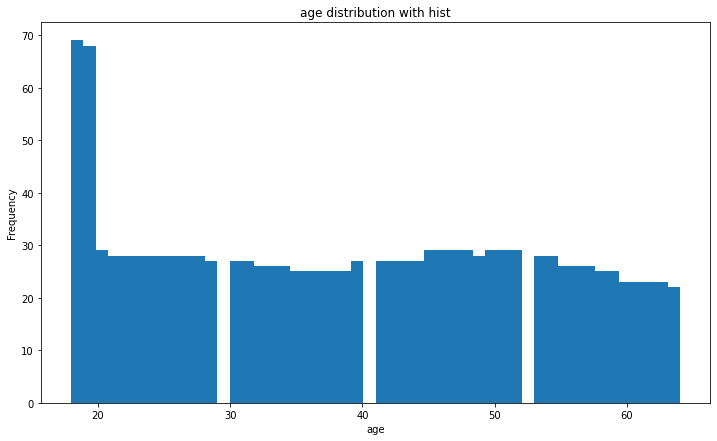

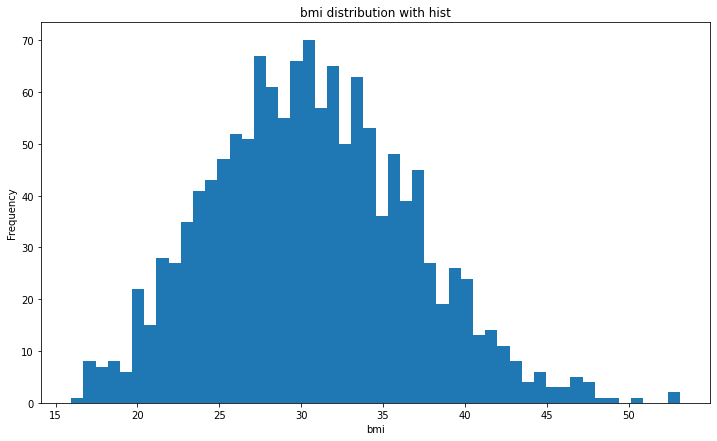

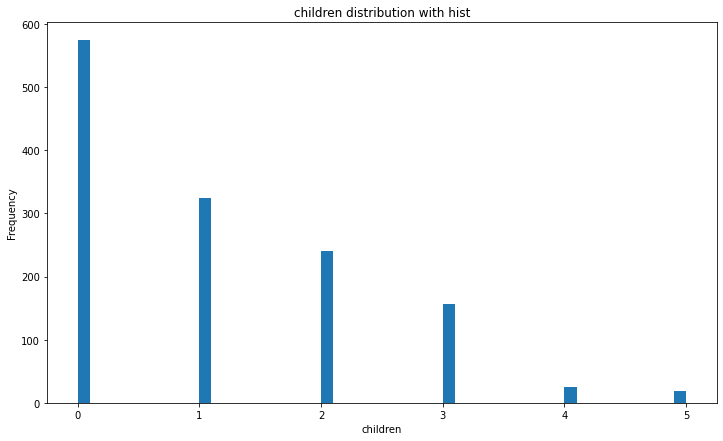

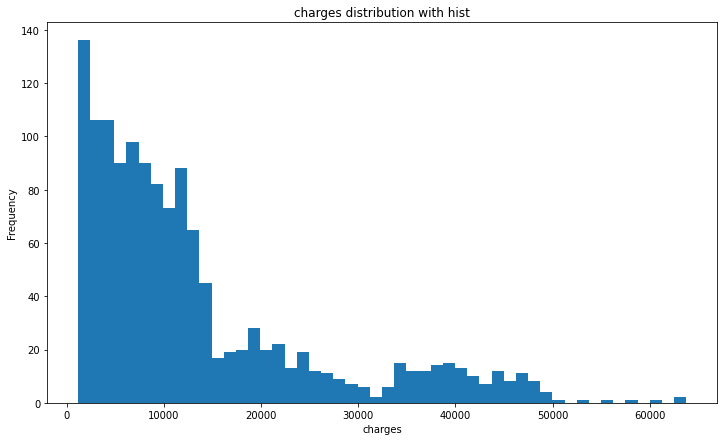

In [9]:
# plotting numerical features 

num_variable = (df.dtypes==float) | (df.dtypes=="int64")
num_variable = df.columns[num_variable].tolist()

def plot_hist(train_df, variable):
    plt.figure(figsize = (12,7))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
    
for i in num_variable:
    plot_hist(df,i)

There are 2 unique sex


Count of sex


male      676
female    662
Name: sex, dtype: int64


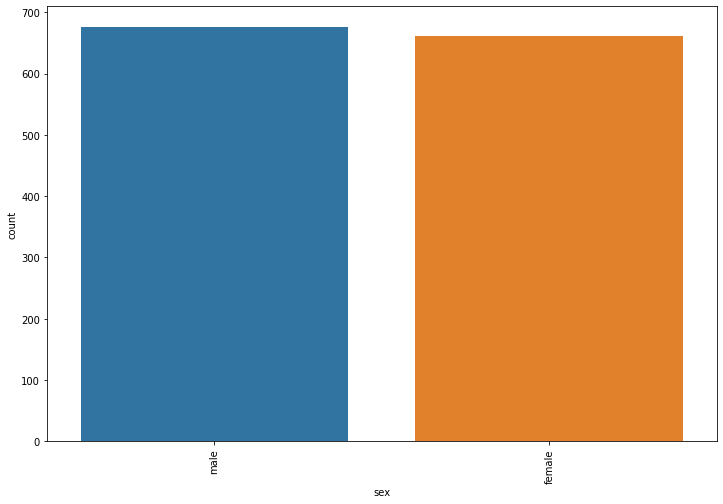



There are 2 unique smoker


Count of smoker


no     1064
yes     274
Name: smoker, dtype: int64


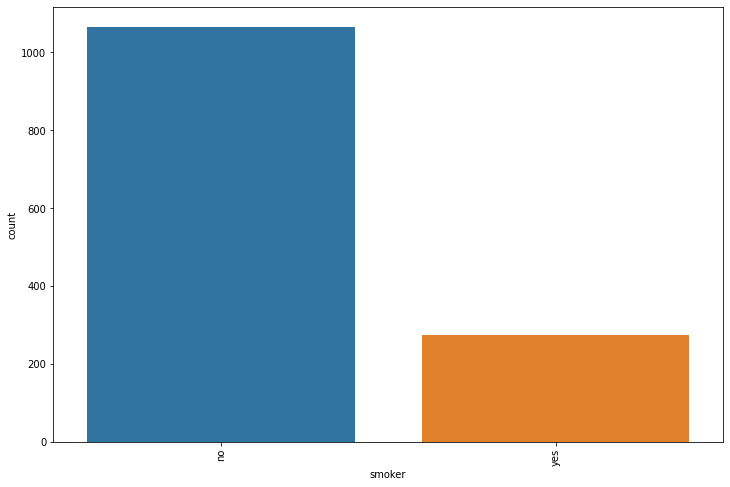



There are 4 unique region


Count of region


southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


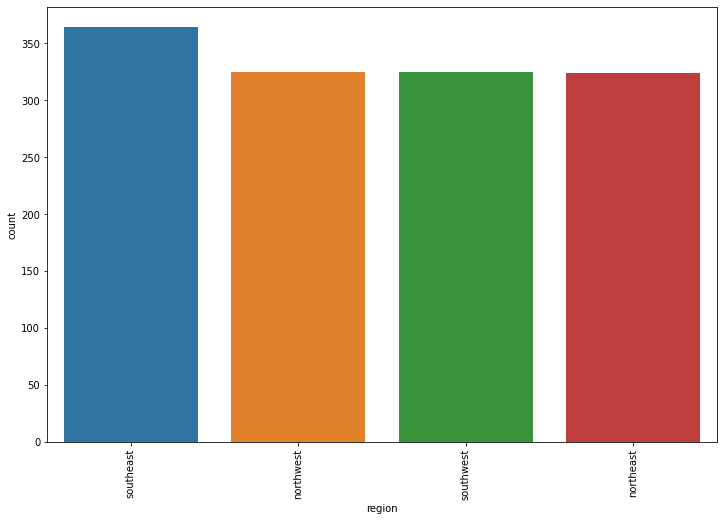

In [10]:
##plotting the categorical features

cat_variable = df.dtypes==object
cat_variable = df.columns[cat_variable].tolist()

# Count of products per keys
def bar_plot(data,feature):
    print(f'There are {len(set(data[feature]))} unique {feature}')
    print('\n')
    sns.countplot(x = feature,
              data = data,
              order = data[feature].value_counts(ascending=False)[0:20].index)
    plt.xticks(rotation=90)
    print(f'Count of {feature}')
    print('\n')
    print(data[feature].value_counts(ascending=False)[0:20])
    plt.show()
    print('\n')
    
for i in cat_variable:
    bar_plot(df,i)

* Doing some analysis

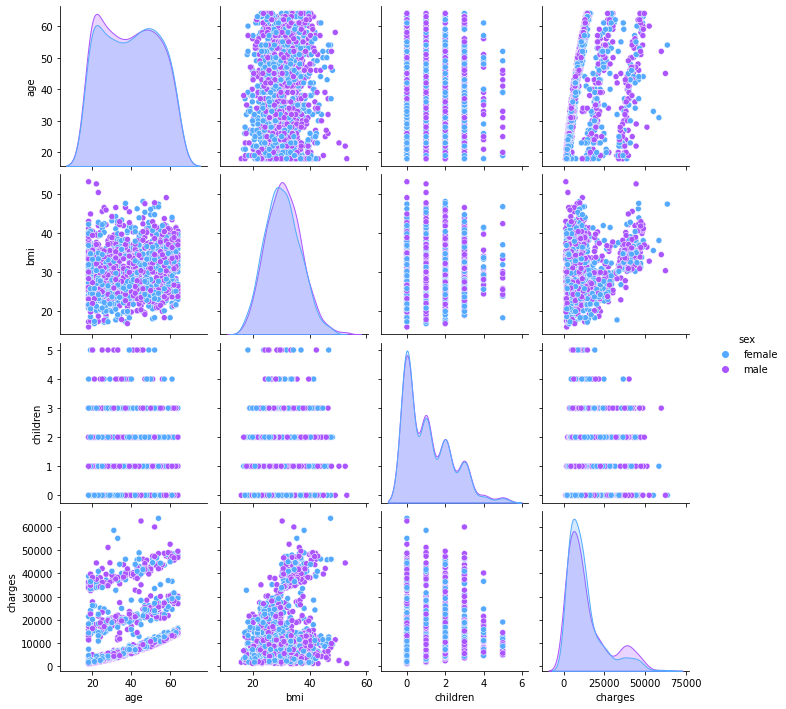

In [11]:
sns.pairplot(data = df,hue = 'sex',palette = 'cool')

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

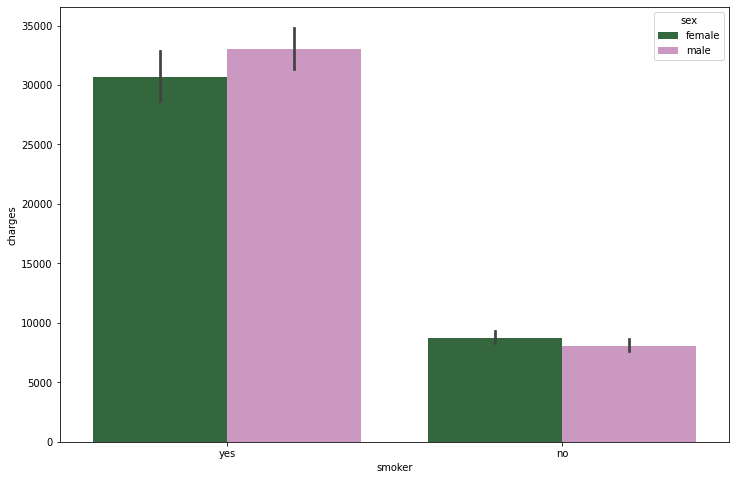

In [13]:
sns.barplot(x = 'smoker', y = 'charges', hue = 'sex', data = df, palette = 'cubehelix')

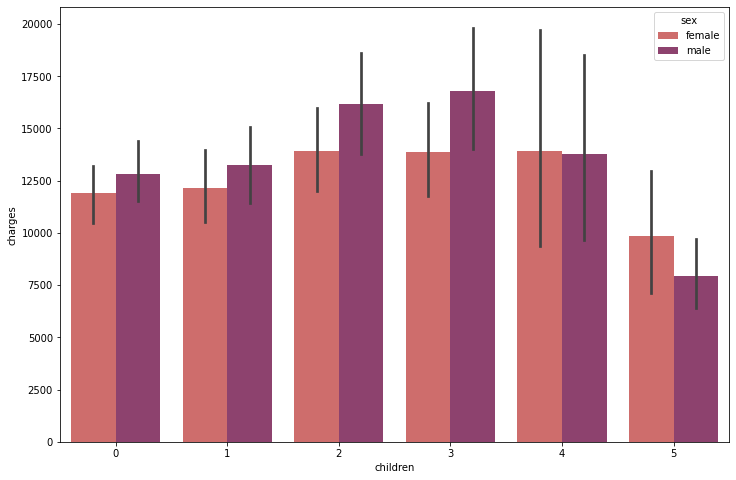

In [14]:
sns.barplot(x = 'children', y = 'charges', hue = 'sex', data = df, palette = 'flare')

* When the effect of the number of children on insurance costs is examined, it is interesting that the insurance costs of families with 5 children are lower.

In [15]:
df.groupby('age')[['charges']].mean().sort_values('charges', ascending = False)

,charges
age,
64,23275.530837
61,22024.457609
60,21979.418507
63,19884.998461
43,19267.278653
62,19163.856573
59,18895.869532
54,18758.546475
52,18256.269719


In [16]:
# creating new feature by using age column

df["age_range"] = 1338
for i in range(len(df["age"])):
    if df["age"][i]<30:
        df["age_range"][i] = 1
    elif df["age"][i] >=30 and df["age"][i]<45:
        df["age_range"][i] = 2
    elif df["age"][i] >=45:
        df["age_range"][i] = 3

In [17]:
df

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,2
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,3
1334,18,female,31.920,0,no,northeast,2205.98080,1
1335,18,female,36.850,0,no,southeast,1629.83350,1
1336,21,female,25.800,0,no,southwest,2007.94500,1


* We created a new column with the name "age_range", with 1 for those younger than 30, 2 for those aged between 30 and 45, and 3 for those over 45.

In [18]:
df.groupby('age_range')[['charges']].mean()

,charges
age_range,
1,9182.487125
2,12490.912530
3,17070.491773


*  ***`Looking at the average of insurance costs according to "age_range", those with a higher "age range" have higher insurance costs.`***

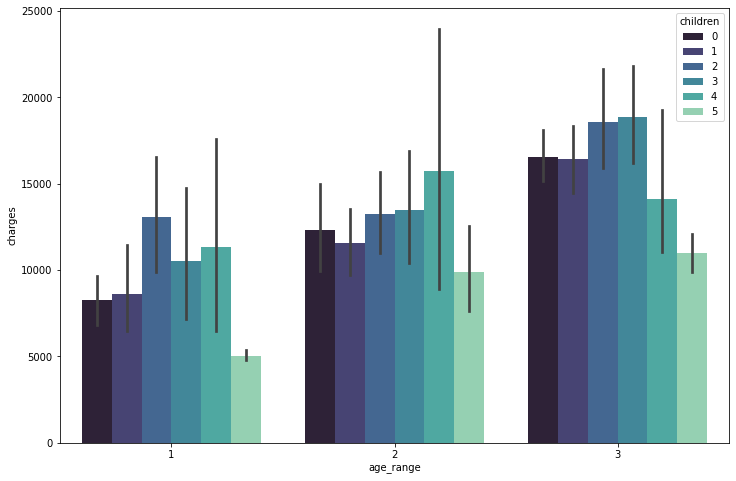

In [19]:
sns.barplot(x = 'age_range', y = 'charges', hue = 'children', data = df, palette = 'mako')

* It is seen that the insurance costs of people who have 5 children are lower than their age groups.

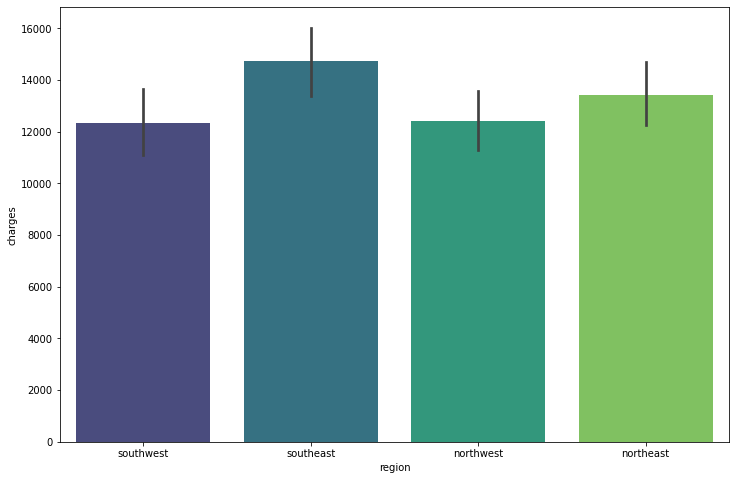

In [20]:
sns.barplot(x='region', y='charges', data=df, palette='viridis')

* Compared to other regions, those living in the Southeast region have higher insurance costs.

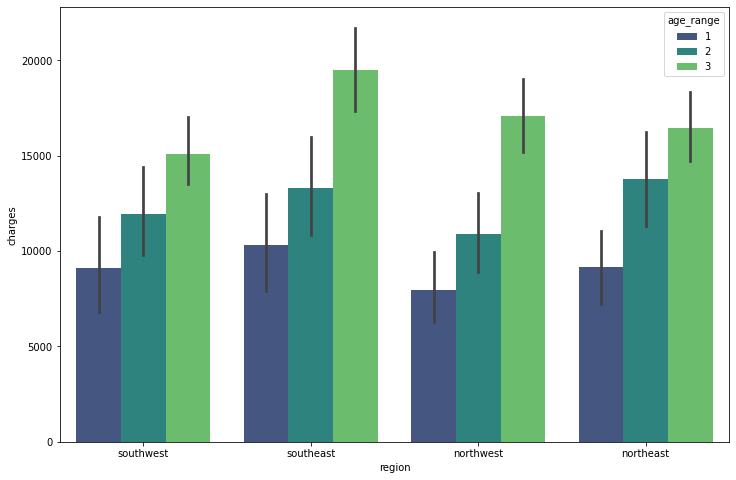

In [21]:
sns.barplot(x='region', y='charges', data=df, hue= "age_range" , palette='viridis')

In [22]:
#creating new feature by using children 
df["have_children"] = ["No" if i == 0 else "Yes" for i in df["children"]]
df

,age,sex,bmi,children,smoker,region,charges,age_range,have_children
0,19,female,27.900,0,yes,southwest,16884.92400,1,No
1,18,male,33.770,1,no,southeast,1725.55230,1,Yes
2,28,male,33.000,3,no,southeast,4449.46200,1,Yes
3,33,male,22.705,0,no,northwest,21984.47061,2,No
4,32,male,28.880,0,no,northwest,3866.85520,2,No
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,3,Yes
1334,18,female,31.920,0,no,northeast,2205.98080,1,No
1335,18,female,36.850,0,no,southeast,1629.83350,1,No
1336,21,female,25.800,0,no,southwest,2007.94500,1,No


We have created a new column as those who have children and those who do not. Thus, we will be able to examine the insurance costs of people with and without children.

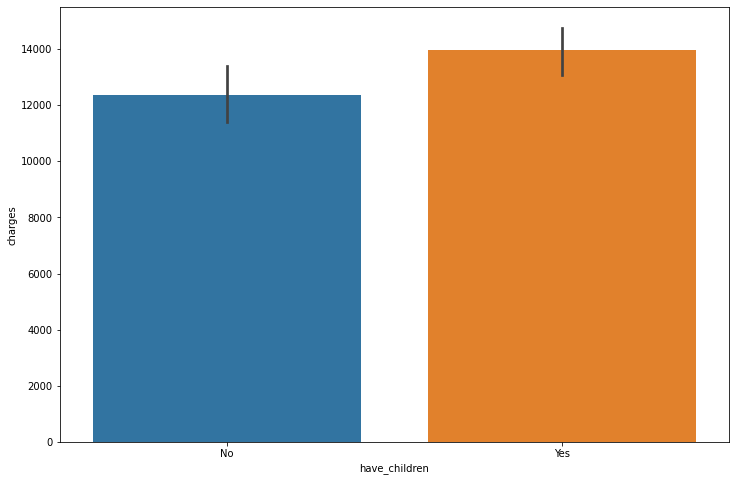

In [23]:
sns.barplot(x = 'have_children', y = 'charges', data = df)

It is seen that the insurance costs of those who do not have children are less. I think that this newly created variable will affect the model.

In [24]:
cat_variable.append("have_children") #Converting categorical variables to numeric variables

In [25]:
cat_variable

['sex', 'smoker', 'region', 'have_children']

In [26]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df[cat_variable] = df[cat_variable].apply(lambda col: lb.fit_transform(col.astype(str)))

In [27]:
df[cat_variable]

,sex,smoker,region,have_children
0,0,1,3,0
1,1,0,2,1
2,1,0,2,1
3,1,0,1,0
4,1,0,1,0
...,...,...,...,...
1333,1,0,1,1
1334,0,0,0,0
1335,0,0,2,0
1336,0,0,3,0


In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,have_children
0,19,0,27.900,0,1,3,16884.92400,1,0
1,18,1,33.770,1,0,2,1725.55230,1,1
2,28,1,33.000,3,0,2,4449.46200,1,1
3,33,1,22.705,0,0,1,21984.47061,2,0
4,32,1,28.880,0,0,1,3866.85520,2,0


# Now we can start Modelling

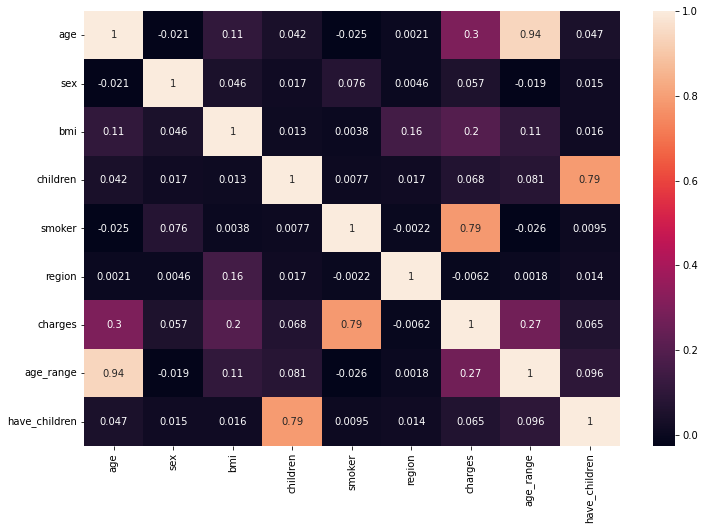

In [29]:
sns.heatmap(df.corr(), annot = True)# looking the correlation values

* **When we look at the correlations of the variables, it is seen that the linear correlation with the smoker variable is quite high and the sex variables is quite low that's why we are going to drop this feature from the data for the model.** 

In [30]:
X = df.drop(columns=["charges","sex"])
y = df["charges"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

* We decide to create a model function to see all model that I choose. This function is going to give us all models' error rate and we are going to pick up one to use as a main model which has the lowest error and we are going to use fine tuning to get best paremeters and we can get better result with it.

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
def models():
  #using logistic regression
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train, y_train)

  #use Kneighbors
  from sklearn.neighbors import KNeighborsRegressor
  knn = KNeighborsRegressor()
  knn.fit(X_train,y_train)

  #use Support vector classifier (linear kernel)
  from sklearn.svm import SVR
  svc = SVR(kernel='linear')
  svc.fit(X_train,y_train)

  #use decision tree
  from sklearn.tree import DecisionTreeRegressor
  tree=DecisionTreeRegressor()
  tree.fit(X_train,y_train)

  #use Random Forest
  from sklearn.ensemble import RandomForestRegressor
  forest = RandomForestRegressor()
  forest.fit(X_train,y_train)

  #use GradientBoosting
  from sklearn.ensemble import GradientBoostingRegressor
  gb = GradientBoostingRegressor()
  gb.fit(X_train,y_train)
    
    
  from xgboost import XGBRegressor
  xgb = XGBRegressor()
  xgb.fit(X_train,y_train)

  from lightgbm import LGBMRegressor
  lgbm = LGBMRegressor()
  lgbm.fit(X_train,y_train)
  #Print the accuracy for ech model
  print("Results")
  print('[0] Logistic Regression Test Error: ',np.sqrt(mean_squared_error(y_test,lr.predict(X_test))))
  print('[1] K neighbors Regression Test Error: ',np.sqrt(mean_squared_error(y_test,knn.predict(X_test))))
  print('[2] SVR linear Regression Test Error: ',np.sqrt(mean_squared_error(y_test,svc.predict(X_test))))
  print('[3] Decision Tree Regression Test Error: ',np.sqrt(mean_squared_error(y_test,tree.predict(X_test))))
  print('[4] Random Forest Regression Test Error: ',np.sqrt(mean_squared_error(y_test,forest.predict(X_test))))
  print('[5] Gradient Boosting Regression Test Error: ',np.sqrt(mean_squared_error(y_test,gb.predict(X_test))))
  print('[6] XGBoost Regression Test Error: ',np.sqrt(mean_squared_error(y_test,xgb.predict(X_test))))
  print('[7] LightGBM Regression Test Error: ',np.sqrt(mean_squared_error(y_test,lgbm.predict(X_test)))) 

  return lr,knn,svc,tree,forest,gb,xgb,lgbm

    

In [33]:
lr,knn,svc,tree,forest,gb,xgb,lgbm = models()

[03:45:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Results
[0] Logistic Regression Test Error:  5960.253505923568
[1] K neighbors Regression Test Error:  12274.625240244683
[2] SVR linear Regression Test Error:  13973.692256336122
[3] Decision Tree Regression Test Error:  6106.338758907642
[4] Random Forest Regression Test Error:  4274.8616601792555
[5] Gradient Boosting Regression Test Error:  4146.764827799604
[6] XGBoost Regression Test Error:  4106.625829811288
[7] LightGBM Regression Test Error:  4424.800913092445


* According to the results we obtained, our model works best with Gradient Boosting. Then let's move on to model tuning!

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
gb_params = {
    'learning_rate': [0.01],
    'max_depth': [3],
    'n_estimators': [ 500],
    'subsample': [0.5],
}

In [40]:
gb = GradientBoostingRegressor()
gb_cv_model = GridSearchCV(gb, gb_params, cv = 10, n_jobs = -1, verbose = 0)
gb_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [3],
                         'n_estimators': [500], 'subsample': [0.5]})

In [51]:
gb_tuned = gb_cv_model.best_estimator_
gb_tuned

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, subsample=0.5)

In [41]:
gb_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [3],
                         'n_estimators': [500], 'subsample': [0.5]})

In [42]:
y_pred = gb_cv_model.predict(X_test)

In [43]:
np.sqrt(mean_squared_error(y_test, y_pred))

4060.3723792885917

In [44]:
#create the a function to evaluate the results
def res(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [45]:
res(y_test, y_pred)

26.583921221845575

In [46]:
result = pd.concat([pd.DataFrame(y_test).reset_index(), pd.DataFrame(y_pred,columns=["prediction"])],axis=1)
del result["index"]
result

,charges,prediction
0,11299.34300,13112.185090
1,5240.76500,6085.095121
2,17904.52705,19600.193051
3,1621.34020,2360.828940
4,9617.66245,12154.794783
...,...,...
263,38746.35510,38701.107170
264,10422.91665,12143.712601
265,45863.20500,46338.411908
266,5325.65100,5831.891837


#Now Feature Importance

In [52]:
Importance = pd.DataFrame({"Importance": gb_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

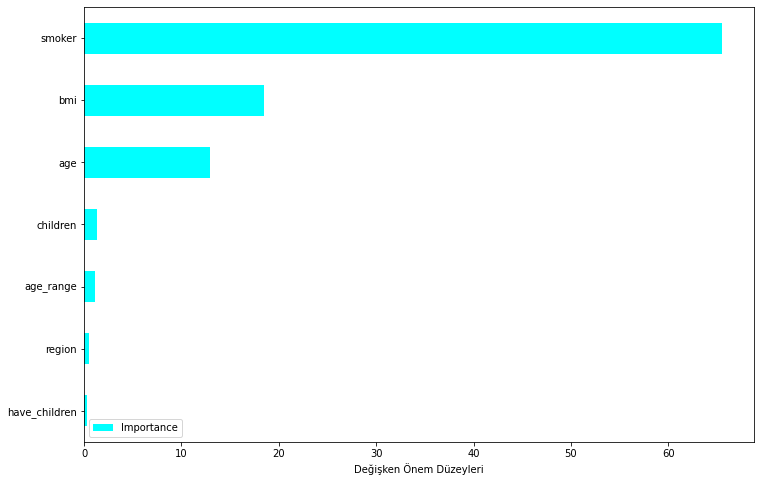

In [55]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "cyan")

plt.xlabel("Değişken Önem Düzeyleri")

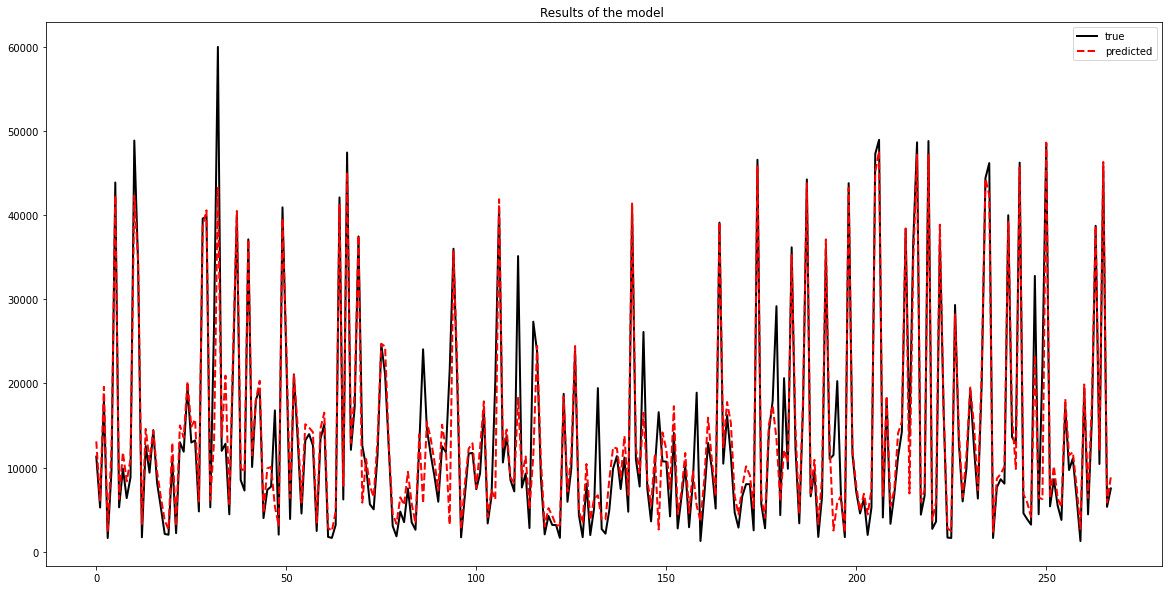

In [61]:
plt.figure(figsize=(20,10))
plt.plot(result["charges"], "black", linewidth=2)
plt.plot(result["prediction"], "r--", linewidth = 2)
plt.legend(["true","predicted"])
plt.title("Results of the model ")
plt.show()


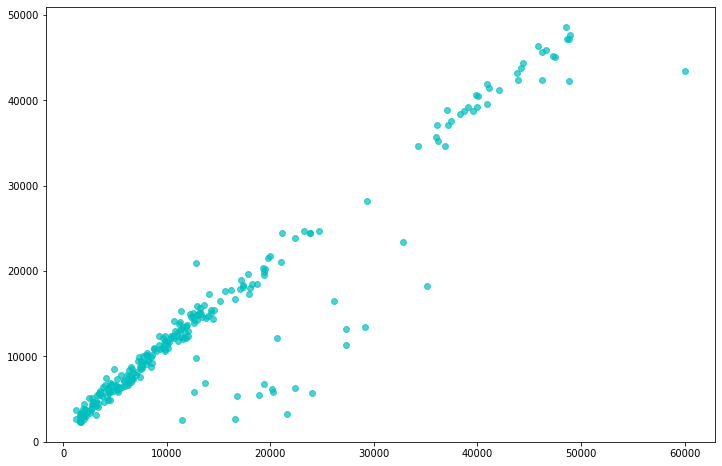

In [62]:
plt.scatter(x=y_test,y=y_pred,c = 'c', marker = 'o', s = 35, alpha = 0.7)